<a href="https://colab.research.google.com/github/Agoroschuk/ML_tasks/blob/main/ML_pipeline_Goroschuk_Anastasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-11-17 17:18:20--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2024-11-17 17:18:20 (5.20 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [3]:
dataset

array([[0, 95, 48, ..., 187, 197, 'van'],
       [1, 91, 41, ..., 189, 199, 'van'],
       [2, 104, 50, ..., 188, 196, 'saab'],
       ...,
       [843, 106, 54, ..., 187, 201, 'saab'],
       [844, 86, 36, ..., 190, 195, 'saab'],
       [845, 85, 36, ..., 186, 190, 'van']], dtype=object)

In [4]:
data

array([[  0,  95,  48, ...,  16, 187, 197],
       [  1,  91,  41, ...,  14, 189, 199],
       [  2, 104,  50, ...,   9, 188, 196],
       ...,
       [843, 106,  54, ...,   4, 187, 201],
       [844,  86,  36, ...,  25, 190, 195],
       [845,  85,  36, ...,  18, 186, 190]])

In [5]:
target[:5]

array(['van', 'van', 'saab', 'van', 'bus'], dtype=object)

In [6]:
pd.DataFrame(dataset)[19].value_counts()

,count
19,
bus,218
saab,217
opel,212
van,199


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,55,94,36,66,151,61,8,133,50,18,135,154,265,119,62,9,3,201,208
1,369,89,47,81,156,57,8,161,41,20,149,187,388,197,72,9,15,187,193
2,837,94,46,77,169,60,8,158,42,20,148,181,373,181,67,12,2,193,199
3,368,84,45,68,148,64,6,146,46,19,142,168,317,180,75,5,1,183,187
4,371,97,45,72,187,71,5,161,40,20,144,178,399,186,70,7,7,196,203
5,194,92,37,86,167,60,7,158,42,20,131,181,373,144,68,9,21,190,196
6,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
7,330,98,44,78,160,63,8,142,47,18,148,160,300,171,63,19,2,201,207
8,726,102,48,105,214,64,10,201,33,23,152,214,600,178,64,0,25,192,204
9,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191


Methods `describe` and `info` deliver some useful information.

In [8]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.417122,93.480874,44.710383,81.480874,169.153005,62.025501,8.621129,167.903461,41.160291,20.511840,147.648452,188.163934,435.768670,173.584699,72.557377,6.375228,12.333333,189.138434,195.673953
std,243.199535,7.995785,6.259147,15.589923,33.977481,8.661270,5.255722,33.440488,7.901526,2.607951,14.585836,32.125758,177.943194,32.748859,8.041798,4.836884,8.942436,6.211521,7.421688
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,145.000000,34.000000,19.000000,136.000000,167.000000,315.000000,148.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,421.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,145.000000,178.000000,362.000000,173.000000,72.000000,6.000000,11.000000,189.000000,196.000000
75%,632.000000,99.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,576.000000,195.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,115.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [10]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

1. No missing values
2. Feature scaling

In [11]:
dataset_pd = pd.DataFrame(dataset)
dataset_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       846 non-null    object
 1   1       846 non-null    object
 2   2       846 non-null    object
 3   3       846 non-null    object
 4   4       846 non-null    object
 5   5       846 non-null    object
 6   6       846 non-null    object
 7   7       846 non-null    object
 8   8       846 non-null    object
 9   9       846 non-null    object
 10  10      846 non-null    object
 11  11      846 non-null    object
 12  12      846 non-null    object
 13  13      846 non-null    object
 14  14      846 non-null    object
 15  15      846 non-null    object
 16  16      846 non-null    object
 17  17      846 non-null    object
 18  18      846 non-null    object
 19  19      846 non-null    object
dtypes: object(20)
memory usage: 132.3+ KB


In [12]:
dataset_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [13]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_standart = std_scale.fit_transform(X_train)
X_test_standart = std_scale.fit_transform(X_test)

In [14]:
pd.DataFrame(X_test_standart)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.183965,1.267239,0.977801,1.545308,0.998019,0.149033,0.832407,1.506537,-1.379020,1.675908,0.999357,1.418304,1.513082,0.786753,-0.045189,1.109431,0.327246,0.073935,0.595000
1,1.206292,-0.352054,-1.191906,-0.449613,0.106139,-0.013102,-0.153862,-0.108775,-0.067560,-0.279099,-1.019752,0.217535,-0.187068,-0.990765,-0.203086,-1.259660,1.677134,0.073935,0.327250
2,-0.599007,-0.814709,-0.190503,-0.823661,0.321420,2.256786,-0.811375,-0.748804,0.588170,-0.670100,-0.532381,-0.749750,-0.698262,0.038324,-0.518880,-0.075114,-1.360115,0.899452,0.728875
3,1.319884,-0.120727,0.143298,0.111459,0.013876,0.797572,0.174894,-0.596417,0.457024,-0.670100,-0.114634,-0.683041,-0.623593,0.069509,-0.834674,-1.259660,-1.022643,1.064555,1.130500
4,1.701228,-0.583382,0.143298,0.049117,-0.170651,0.797572,0.832407,-0.352596,0.325878,-0.279099,0.720859,-0.549622,-0.457025,-0.024045,-0.045189,-1.062236,0.777208,-0.421375,0.193375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.987222,0.920248,-0.357403,0.797213,0.875001,0.311168,0.503650,0.439821,-0.592144,0.502904,-0.462756,0.417663,0.375819,-1.177872,-1.150468,0.319734,-0.122717,1.064555,1.130500
293,1.388850,-1.161701,-0.357403,-0.823661,-1.400830,-1.148045,-0.153862,-0.596417,0.588170,-0.670100,-0.184259,-0.549622,-0.663800,-0.024045,1.375883,-1.062236,-0.122717,-1.246891,-1.547000
294,0.179908,0.226265,1.478502,1.295943,0.198403,-0.499506,0.503650,1.354149,-1.247874,1.284907,1.834851,1.051402,1.346513,1.410444,0.428501,1.306856,1.114681,-0.421375,-0.208250
295,-0.753168,-1.046037,-0.023602,-1.135367,-1.247057,-0.823776,-0.153862,-0.596417,0.588170,-0.670100,-0.253883,-0.649686,-0.663800,0.287801,1.375883,-1.062236,-0.347699,-1.577098,-1.547000


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [15]:
def grid_search_cv(X_train):
    model = LogisticRegression(max_iter = 1000,
                               solver = 'saga', #learning rate inside
                               tol = 1e-3)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
    cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    grid_result = grid_search.fit(X_train, y_train)

    res = (grid_search.best_params_, grid_search.best_score_)
    # res = {"Best parameters": grid_search.best_params_,
    #        "Best cross-validation score": grid_result.best_score_}
    return res

In [16]:
%%time
grid_search_cv(X_train_standart)

CPU times: user 13.8 s, sys: 31.6 ms, total: 13.8 s
Wall time: 21.8 s


({'C': 10, 'penalty': 'l1'}, 0.7663636363636364)

In [17]:
def random_search_cv(X_train):
    model = LogisticRegression(max_iter = 1000,
                               solver = 'saga',
                               tol = 1e-3)
    param_dist = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'] }

    cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
    random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=cv)
    random_result = random_search.fit(X_train, y_train)

    res = (random_search.best_params_, random_result.best_score_)
    return res

In [18]:
%%time
random_search_cv(X_train_standart)

CPU times: user 6.88 s, sys: 12.9 ms, total: 6.9 s
Wall time: 6.9 s


({'penalty': 'l1', 'C': 100}, 0.77)

In [19]:
penalty_base, C_base = grid_search_cv(X_train_standart)[0]['penalty'], grid_search_cv(X_train_standart)[0]['C']

**Using RandomizedSearchCV helps to save time, but not as precise as GridSearchCV. But this approach may be also usefull.**

In [20]:
!pip install scikit-plot

Для построения roc-plot ниже необходимо раскомментировать !pip install scipy==1.9.3, затем закомментировать снова, перезапустить сеанс и выполнить весь код.

Это позволяет добиться совместимости версий

In [21]:
# Please uncomment before importing scikitplot, then restart the kernel, comment again and use further code

# !pip install scipy==1.9.3

In [22]:
import scikitplot as skplt

In [23]:
def roc_plot(X_train, X_test, penalty, C):
    model = LogisticRegression(max_iter=500,
                               solver='saga',
                               tol=1e-3,
                               C = C,
                               penalty=penalty)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test) # gives the probability for each class to be correctly classified   (297,4)
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

accuracy:  0.7845117845117845
   f1:     0.7810889934971644


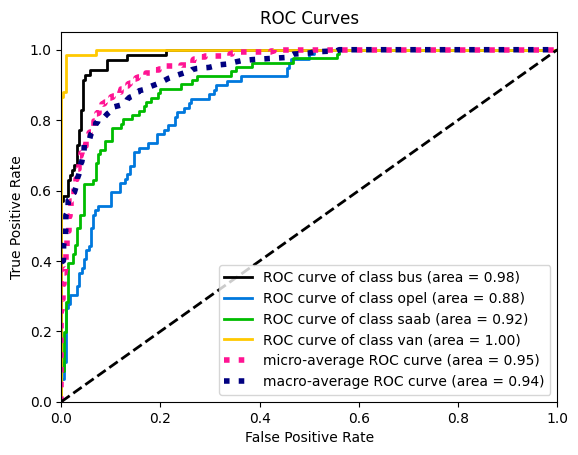

In [24]:
roc_plot(X_train_standart, X_test_standart, penalty_base, C_base)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=19)
pca.fit(X_train_standart)
pca.explained_variance_ratio_

array([4.91526480e-01, 1.54286595e-01, 1.11281901e-01, 6.42926046e-02,
       5.15879142e-02, 4.78581604e-02, 2.71090516e-02, 1.72680634e-02,
       1.14749579e-02, 8.26024051e-03, 4.50630948e-03, 3.35280918e-03,
       2.29385980e-03, 1.95861070e-03, 1.09015090e-03, 8.57491132e-04,
       6.45806990e-04, 3.30820130e-04, 1.81733408e-05])

Text(0, 0.5, 'Explained Variance')

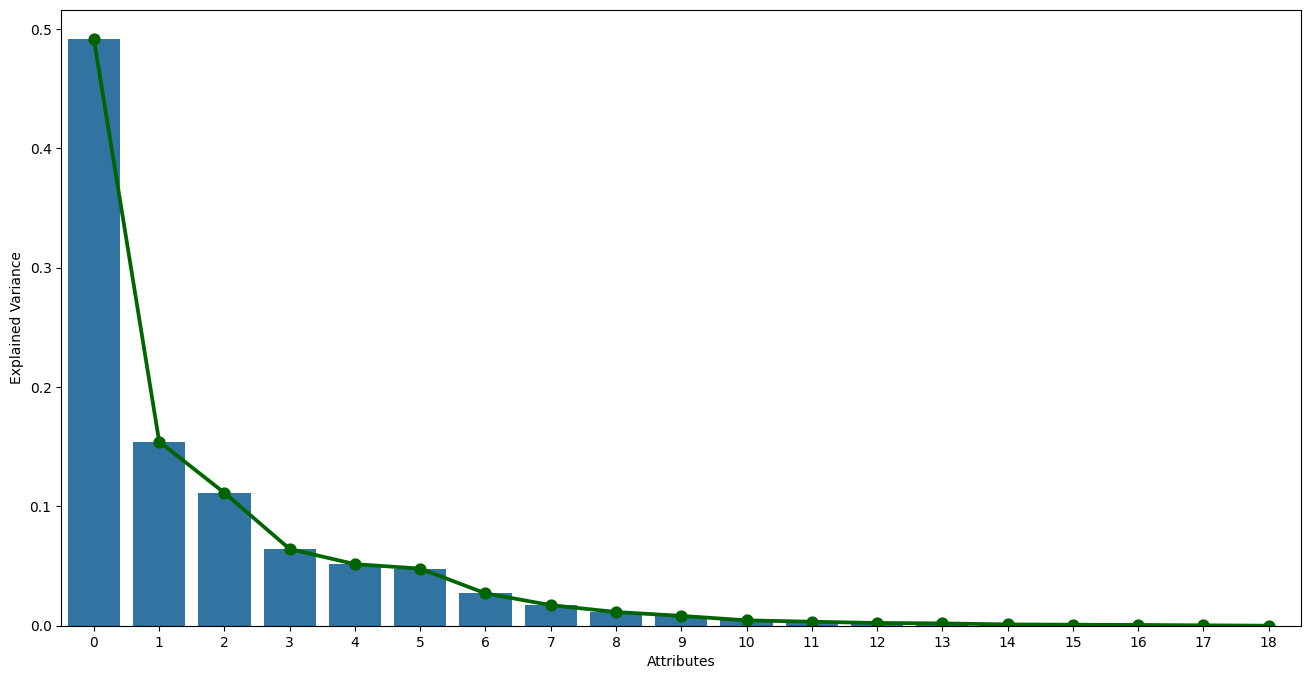

In [26]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(pca.explained_variance_ratio_, ax=axes)
plot = sns.pointplot(pca.explained_variance_ratio_, ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

**From this graph we can observe that 14 attributes will be enough for further investigation. It's important to notice that the basis was changed and reduced during PCA procedure.**

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

**The data was normalized in 2.0. step (scaling). If not, we will not obtain correct variance and will not choose correct principal components (vectors).**


To compute low-rank approximation, we need to compute **singular value decomposition** (SVD).

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where
- $U$ is an $n \times K$ unitary matrix,
- $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$,
- $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal.
- Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [27]:
pca = PCA(n_components=14)
pca.fit(X_train_standart)
X_train_pca = pca.transform(X_train_standart)
X_test_pca = pca.transform(X_test_standart)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [28]:
random_search_cv(X_train_pca)

({'penalty': 'l2', 'C': 10}, 0.740909090909091)

In [29]:
penalty_pca = random_search_cv(X_train_pca)[0]['penalty']
C_pca = random_search_cv(X_train_pca)[0]['C']

accuracy:  0.7710437710437711
   f1:     0.7632065064706194


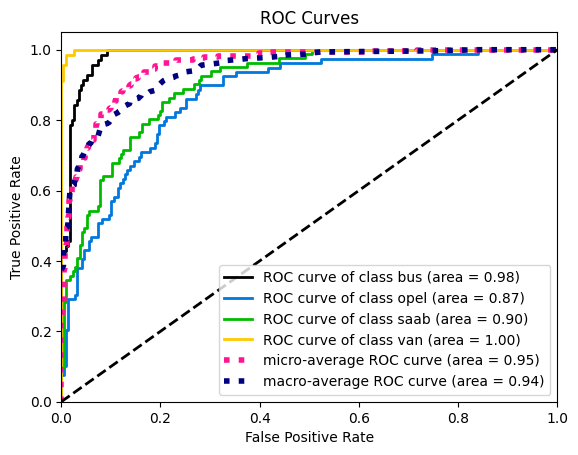

In [30]:
roc_plot(X_train_pca, X_test_pca, penalty_pca, C_pca)

**Applying PCA doesn't lead to better results**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
def grid_search_tree(X_train):
    model = DecisionTreeClassifier()
    param_dist = {'max_depth': range(1, 100)}
    cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
    random_search = GridSearchCV(model, param_dist, cv=cv)
    random_result = random_search.fit(X_train, y_train)

    res = (random_search.best_params_, {'cross validation score': random_result.best_score_})
    return res

In [33]:
X_train.shape

(549, 19)

In [34]:
grid_search_tree(X_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


({'max_depth': 7}, {'cross validation score': 0.6781818181818182})

In [35]:
max_depth = grid_search_tree(X_train)[0]['max_depth']

In [36]:
def roc_plot_tree(X_train, X_test):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test) # gives the probability for each class to be correctly classified
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

accuracy:  0.6531986531986532
   f1:     0.6474060393559636


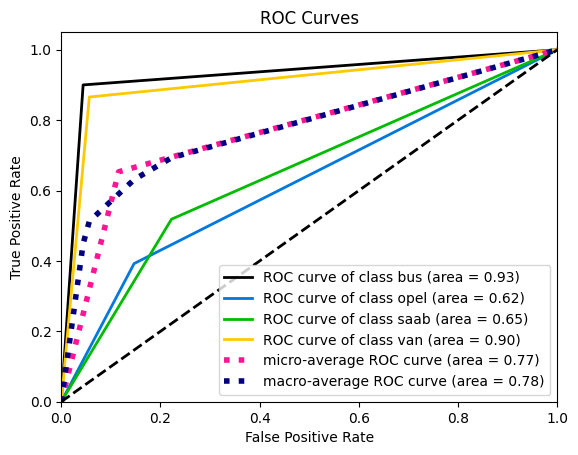

In [37]:
roc_plot_tree(X_train, X_test)

**Here we can see that using decision tree gives worse results (f1, accuracy), than logistic regression. Innaccuracy however is expected for decision trees. They are not good in classifying new samples (overfitting id observed). This problem with low accuracy can be and will be solved in 2.6, 2.7.**

#### 2.6. Bagging (Bootstrap aggregating).
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensemble varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this task. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

**Actually N is a number of decision trees for further usage in random forest. Using this approach helps to solve main trees problem - high variance via averaging the results on every tree.**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
N_min = 2
N_max = 100
step = 5

In [39]:
def bagging_logreg(X_train, X_test, C, N_min, N_max, step):
    lr_accuracy = []
    lr_f1 = []

    for n in np.arange(N_min, N_max, 5):
        bagging_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=500,
                                                                   solver='saga',
                                                                   tol=1e-3,
                                                                   C = C,
                                                                  random_state = 42),
                                       n_estimators=n,
                                       random_state = 42)

        with ignore_warnings(category=ConvergenceWarning):
            bagging_lr.fit(X_train, y_train)

        y_lr_pred = bagging_lr.predict(X_test)

        f1 = f1_score(y_test, y_lr_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_lr_pred)

        lr_accuracy.append(accuracy)
        lr_f1.append(f1)

    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), lr_f1, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), lr_accuracy, label='Accuracy', marker='o')
    plt.xlabel('Number of Subsets')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy in Bagging Ensemble. Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

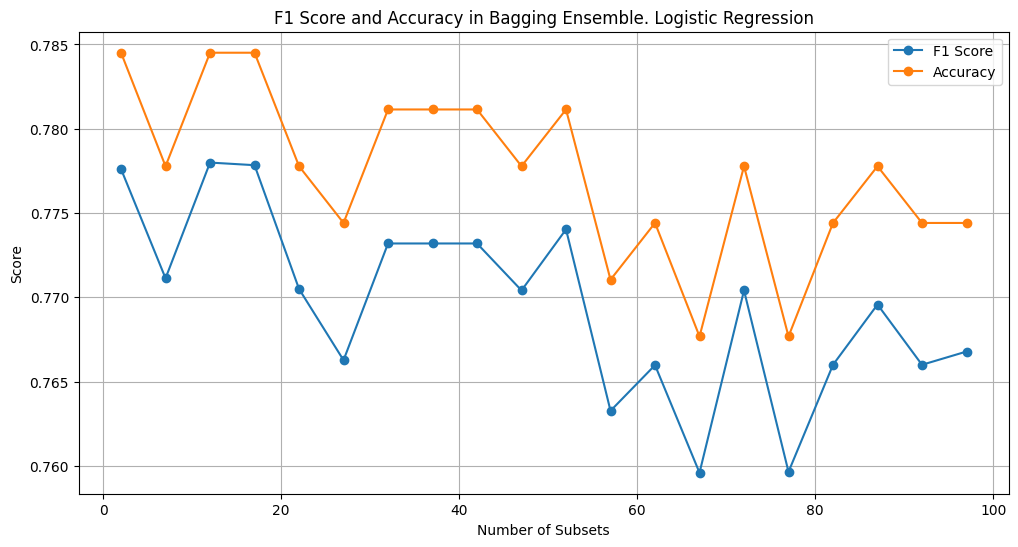

CPU times: user 1min 23s, sys: 175 ms, total: 1min 24s
Wall time: 1min 26s


In [40]:
%%time
bagging_logreg(X_train_pca, X_test_pca, C_base, N_min, N_max, step)

**The most appropriate ensemble size is 10 algorithms**

In [41]:
def bagging_decision_tree(X_train, X_test, max_depth, N_min, N_max, step):
    f1_scores = []
    accuracy_scores = []

    for n_estimators in range(N_min, N_max, step):
        # Build a BaggingClassifier with a DecisionTree base estimator
        bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth = max_depth,
                                                                         criterion='entropy'),
                                        n_estimators=n_estimators, random_state=42)

        # Train the BaggingClassifier
        bagging_clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = bagging_clf.predict(X_test)

        # Evaluate the accuracy and f1 on the test set
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), f1_scores, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), accuracy_scores, label='Accuracy', marker='o')
    plt.xlabel('Ensemble size')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy in Bagging Ensemble. Decision trees')
    plt.legend()
    plt.grid(True)
    plt.show()

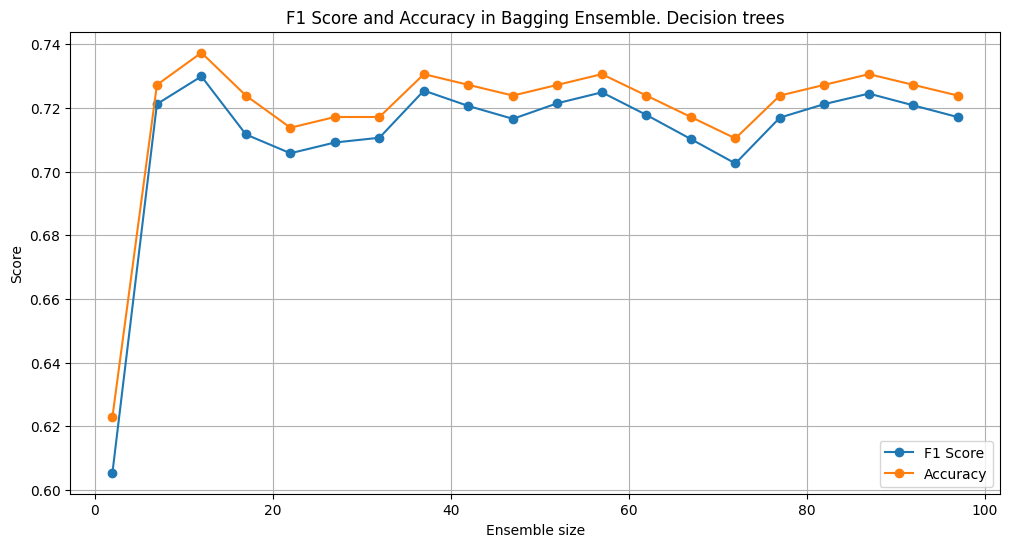

In [42]:
bagging_decision_tree(X_train_pca, X_test_pca, max_depth, N_min, N_max, step)

In [43]:
max_depth

74

**Analyzing the plots gives us the information about the optimal size ensemble (about 90-95 trees).**

**In my opinion optimal parameters for decision tree from 2.5 (max_depth) are appropriate for bagging.**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
def random_forest(X_train, X_test, N_min, N_max, step):

    accuracy = []
    f1 = []
    ensemble_sizes = np.arange(N_min, N_max, step)

    for n_estimators in ensemble_sizes:
        rand_forest_clf = RandomForestClassifier(n_estimators = n_estimators, random_state=42, n_jobs=-1)
        rand_forest_clf.fit(X_train, y_train)
        y_pred = rand_forest_clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    plt.figure(figsize=(12, 6))
    plt.plot(ensemble_sizes, f1, label='F1 Score', marker='o')
    plt.plot(ensemble_sizes, accuracy, label='Accuracy', marker='o')
    plt.xlabel('Ensemble size')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy. Random Forest')
    plt.legend()
    plt.grid(True)
    plt.show()

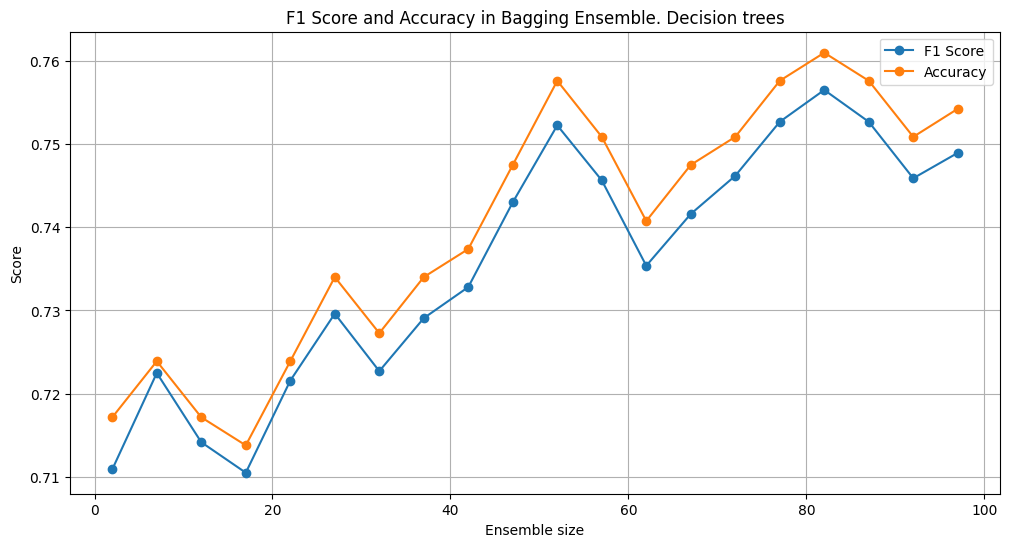

In [46]:
bagging_decision_tree(X_train, X_test, max_depth, N_min, N_max, step)

**From the graph above we can observe that the optimal number of trees ia about 57 trees. This result differ from the result obtained in 2.6 due to differences in computational techniques.**

**Random forest approach helps to find N (number of decision trees) and also adds Random Subspace Method (RSM). RSM helps to obtain different trees on each step via taking random feature subspace in every node of a tree.**

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [47]:
def learning_curve(X_train, X_test):
    dataset_size = []

    lr_acc = []
    dt_acc = []
    rf_acc = []

    lr_f1 = []
    dt_f1 = []
    rf_f1 = []

    lr = LogisticRegression(max_iter=500,
                                 solver='saga', tol=1e-3,
                                 penalty = penalty_pca,
                                 C = C_pca,
                                 random_state = 42)

    dt = DecisionTreeClassifier(max_depth = max_depth, criterion='entropy')

    rf = RandomForestClassifier(n_estimators = 57, random_state=42, n_jobs=-1)
    parts = 10

    X_parts = np.array_split(X_train, parts)
    y_parts = np.array_split(y_train, parts)

    X_united_parts = []
    y_united_parts = []

    for i in range(1, parts + 1):
        X_united_parts = np.concatenate(X_parts[:i], axis = 0)
        y_united_parts = np.concatenate(y_parts[:i], axis = 0)

        #Logistic Regression
        lr.fit(X_united_parts, y_united_parts)
        lr_y_pred = lr.predict(X_test)
        lr_acc.append(accuracy_score(y_test, lr_y_pred))
        lr_f1.append(f1_score(y_test, lr_y_pred, average='weighted'))

        # Decision Tree
        dt.fit(X_united_parts, y_united_parts)
        dt_y_pred = dt.predict(X_test_pca)
        dt_acc.append(accuracy_score(y_test, dt_y_pred))
        dt_f1.append(f1_score(y_test, dt_y_pred, average='weighted'))

        # Random Forest
        rf.fit(X_united_parts, y_united_parts)
        rf_y_pred = rf.predict(X_test_pca)
        rf_acc.append(accuracy_score(y_test, rf_y_pred))
        rf_f1.append(f1_score(y_test, rf_y_pred, average='weighted'))

        dataset_size.append(X_united_parts.shape[0])


    plt.figure(figsize=(12, 6))
    plt.plot(dataset_size, lr_f1, label='F1 Score Logistic Regression')
    plt.plot(dataset_size, lr_acc, label='Accuracy Logistic Regression')

    plt.plot(dataset_size, dt_f1, label='F1 Score Decision Tree')
    plt.plot(dataset_size, dt_acc, label='Accuracy Decision Tree')

    plt.plot(dataset_size, rf_f1, label='F1 Score Random Forest')
    plt.plot(dataset_size, rf_acc, label='Accuracy Random Forest')

    plt.xlabel('Train Dataset size')
    plt.ylabel('Score')
    plt.title('Accuracy and F1-score For Different Train Dataset Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

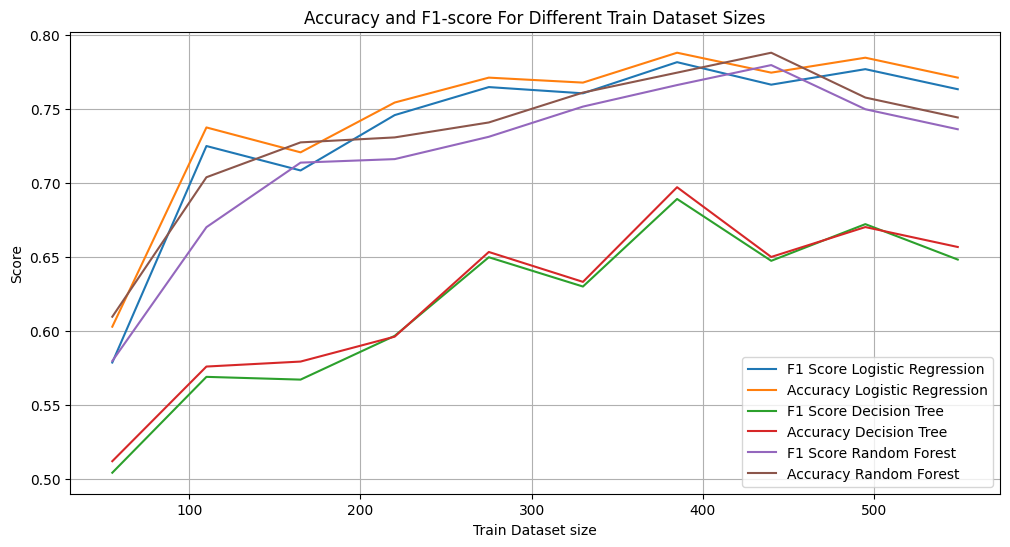

In [48]:
learning_curve(X_train_pca, X_test_pca)

**From the last graph we can conclude that the best results for every model can be obtained with the biggest available train dataset size (>500).**

#### 2.9. Gradient boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package. Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensemble using grid search or other methods. Please, explain your answer.

In [49]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [50]:
from catboost import CatBoostClassifier, Pool

In [51]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target_numeric = label_encoder.fit_transform(target)

X_train, X_val, y_train, y_val = train_test_split(data, target_numeric, random_state = 42, stratify = target_numeric, test_size = 0.35)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 6,
    'learning_rate': 0.05,
    'nthread': 4,
    'objective': 'multi:softprob',  # Используем softprob для получения вероятностей
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss'
}

# Списки для хранения результатов
evals = [(dtrain, 'train'), (dval, 'eval')]

# Обучение модели с использованием ранней остановки
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, verbose_eval=True)

# Получение лучшей модели
best_num_boost_round = model.best_iteration
print(f'Лучшее количество итераций: {best_num_boost_round}')

[0]	train-mlogloss:1.32241	eval-mlogloss:1.33496
[1]	train-mlogloss:1.26417	eval-mlogloss:1.28988
[2]	train-mlogloss:1.20963	eval-mlogloss:1.24976
[3]	train-mlogloss:1.15925	eval-mlogloss:1.21223
[4]	train-mlogloss:1.11218	eval-mlogloss:1.17712
[5]	train-mlogloss:1.06867	eval-mlogloss:1.14563
[6]	train-mlogloss:1.02517	eval-mlogloss:1.11493
[7]	train-mlogloss:0.98502	eval-mlogloss:1.08546
[8]	train-mlogloss:0.94693	eval-mlogloss:1.05699
[9]	train-mlogloss:0.91205	eval-mlogloss:1.03112
[10]	train-mlogloss:0.87911	eval-mlogloss:1.00567
[11]	train-mlogloss:0.84792	eval-mlogloss:0.98161
[12]	train-mlogloss:0.81817	eval-mlogloss:0.95812
[13]	train-mlogloss:0.78970	eval-mlogloss:0.93624
[14]	train-mlogloss:0.76096	eval-mlogloss:0.91556
[15]	train-mlogloss:0.73468	eval-mlogloss:0.89582
[16]	train-mlogloss:0.71066	eval-mlogloss:0.87853
[17]	train-mlogloss:0.68712	eval-mlogloss:0.86135
[18]	train-mlogloss:0.66421	eval-mlogloss:0.84452
[19]	train-mlogloss:0.64187	eval-mlogloss:0.82918
[20]	train

In [52]:
def catboost_ensemble():
  model = CatBoostClassifier(
      iterations=5,
      loss_function='MultiClass',
      eval_metric='Accuracy',
      logging_level='Silent')

  param_grid = {
        'iterations': [100, 200, 300, 350, 400, 450, 500],
        'depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.15]
    }
  cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
  grid_search = GridSearchCV(model, param_grid, cv=cv)

  grid_result = grid_search.fit(X_train, y_train)
  res = (grid_search.best_params_, grid_result.best_score_)
  print("Best parameters", grid_search.best_params_)
  print("Best cross-validation score", grid_result.best_score_)

In [ ]:
catboost_ensemble()